In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
 
!cp '/content/gdrive/My Drive/parcial 3/data_radius_density.csv' 'data_radius_density.csv'

!cp '/content/gdrive/My Drive/parcial 3/data_pressure_vs_temparature.csv' 'data_pressure_vs_temparature.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Examen parcial 3 (calculo numerico y algebra lineal)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ para ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.10am del 30.03.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

# Ejercicio 1

El archivo $\textbf{data_radius_density.csv}$ contiene dos columnas: radio ($ r $) y la densidad ($ \rho (r) $) de un disco plano en función del radio

El disco es lo suficientemente delgado como para que, con fines matemáticos, podamos tratarlo como un objeto bidimensional. Asumimos que la densidad se da en términos de masa por unidad de área (llamada densidad de área), y además asumimos que la densidad varía solo a lo largo del radio del disco (llamada densidad radial). Orientamos el disco en el plano xy, con el centro en el origen. Entonces, la densidad del disco puede ser tratada como una función de x, denotada $\rho(x)$.
<table><tr>
<td> <img src="disk_radius_density.png" width="500" /> </td>
</tr></table>   

* a) importar los datos usando Pandas, graficar la densidad del disco frente a su radio (los gráficos deben tener etiquetas para el eje `x` y el eje `y`).

* b) sabiendo que la masa del disco viene dada por una integral:
$$ m = \int_0^{r} 2 \pi \ r * \rho (r) \ dr $$
     calcular la masa del disco mediante integración numérica

* Pista:`x`: is radius and `y`: is ***integrand***


In [2]:
import pandas as pd

df=pd.read_csv('data_radius_density.csv')
df.head()
radius=df['radius']
density=df['density']
print (df)

      radius   density
0   0.000000  0.000000
1   0.040404  0.201008
2   0.080808  0.284268
3   0.121212  0.348155
4   0.161616  0.402015
..       ...       ...
95  3.838384  1.959179
96  3.878788  1.969464
97  3.919192  1.979695
98  3.959596  1.989873
99  4.000000  2.000000

[100 rows x 2 columns]


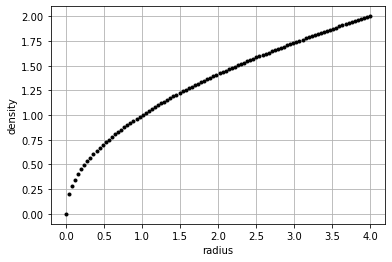

In [3]:
import matplotlib.pyplot as plt

plt.plot(radius,density,'.k')
plt.xlabel('radius')
plt.ylabel('density')
plt.grid()

In [4]:
import numpy as np

def distance(radius):
  distancia=radius*2*np.pi
  return distancia

df["distance"]=df["radius"].apply(distance)
df.head()
distance=df["distance"]
print(df)

      radius   density   distance
0   0.000000  0.000000   0.000000
1   0.040404  0.201008   0.253866
2   0.080808  0.284268   0.507732
3   0.121212  0.348155   0.761598
4   0.161616  0.402015   1.015464
..       ...       ...        ...
95  3.838384  1.959179  24.117277
96  3.878788  1.969464  24.371143
97  3.919192  1.979695  24.625009
98  3.959596  1.989873  24.878875
99  4.000000  2.000000  25.132741

[100 rows x 3 columns]


In [5]:
import scipy.integrate
from scipy.integrate import quad

m=np.trapz(distance,density)
print ('la masa de la barra es:')
print (m)

mass=scipy.integrate.trapz(distance,density)

print ('la masa de la barra es:')
print (mass)

la masa de la barra es:
16.765555353752916
la masa de la barra es:
16.765555353752916


# Ejercicio 2

La capacidad calorífica de un gas muy frío se puede aproximar mediante:

$$ C_v \approx \left (\frac{dP}{dT} \right) $$
(en las unidades de $ \left [\frac {J} {K} \right] $)

Donde $P$ es la presión $ [J / s^3] $ del gas y $ T \ [K] $ es la temperatura del gas.

Los datos para la presión frente a la temperatura se dan en el archivo csv ($ \textbf{data_pressure_vs_temperature.csv} $).

* a) importar los datos usando pandas
* b) hacer un gráfico de $P$ vs $T$ (grafico tiene que tener etiquietas)
* c) utilizando la derivada numérica, encuentre la capacidad calorífica.
* d) hacer un gráfico de $C_v$ vs $T$ (grafico tiene que tener etiquietas)
* e) usando el ultimo grafico hace una estimacion de Temperatura Critica de este gas (Temperatura Critica es Temperatura de cambio abrupto del comportamiento de Capacidad Termica)
* f) hace interpolacion cubica (100 puntos) de los valores de pression $P$, repite puntos `c)` y `d)`

*gas muy frío se refiere a un gas Bose no homogéneo, y la teoría que relaciona $ C_v $ y $ P $ se refiere a la Teoría de Variables Globales Termodinámicas. La presión en realidad se llama parámetro de presión.

In [6]:
df=pd.read_csv('data_pressure_vs_temparature.csv')
df.head()
Pressure=df['Pressure']
Temperature=df['Temperature']
print (df)

     Temperature      Pressure
0   4.789201e-08  1.958251e-17
1   6.625061e-08  2.055515e-17
2   8.460922e-08  2.237848e-17
3   1.029678e-07  2.534132e-17
4   1.213264e-07  2.994527e-17
5   1.396850e-07  3.681453e-17
6   1.580436e-07  4.642824e-17
7   1.764022e-07  5.895152e-17
8   1.947608e-07  7.447724e-17
9   2.131194e-07  9.347272e-17
10  2.314781e-07  1.154354e-16
11  2.498367e-07  1.374488e-16
12  2.681953e-07  1.534382e-16
13  2.865539e-07  1.671772e-16
14  3.049125e-07  1.802543e-16
15  3.232711e-07  1.929425e-16
16  3.416297e-07  2.053711e-16
17  3.599883e-07  2.176142e-16
18  3.783469e-07  2.297188e-16
19  3.967055e-07  2.417169e-16
20  4.150641e-07  2.536311e-16
21  4.334227e-07  2.654779e-16
22  4.517813e-07  2.772699e-16
23  4.701399e-07  2.890164e-16
24  4.884985e-07  3.007252e-16
25  5.068571e-07  3.124020e-16
26  5.252157e-07  3.240518e-16
27  5.435743e-07  3.356784e-16
28  5.619329e-07  3.472849e-16
29  5.802915e-07  3.588741e-16
30  5.986501e-07  3.704482e-16


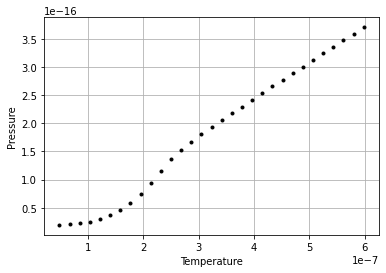

In [7]:
plt.plot(Temperature,Pressure,'.k')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.grid()

In [8]:
Cv=np.gradient(Pressure,Temperature)
print (Cv)

[5.29799802e-11 7.61486415e-11 1.30352287e-10 2.06082997e-10
 3.12475005e-10 4.48916825e-10 6.02904968e-10 7.63919658e-10
 9.40191259e-10 1.11550372e-09 1.19769793e-09 1.03501324e-09
 8.09658111e-10 7.30340985e-10 7.01723220e-10 6.84061313e-10
 6.71936615e-10 6.63114111e-10 6.56443006e-10 6.51256053e-10
 6.47135543e-10 6.43805355e-10 6.41075324e-10 6.38810197e-10
 6.36911237e-10 6.35304785e-10 6.33934876e-10 6.32758315e-10
 6.31741302e-10 6.30857069e-10 6.30445179e-10]


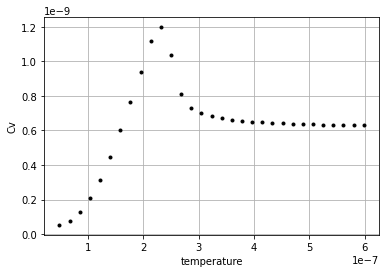

In [9]:
plt.plot(Temperature, Cv, '.k')

plt.xlabel('temperature')
plt.ylabel('Cv')
plt.grid()

In [10]:
df.iloc[8:,]

,Temperature,Pressure
8,1.947608e-07,7.447724e-17
9,2.131194e-07,9.347272e-17
10,2.314781e-07,1.154354e-16
11,2.498367e-07,1.374488e-16
12,2.681953e-07,1.534382e-16
13,2.865539e-07,1.671772e-16
14,3.049125e-07,1.802543e-16
15,3.232711e-07,1.929425e-16
16,3.416297e-07,2.053711e-16
17,3.599883e-07,2.176142e-16


Observemos que a partir de  2.131194e-07 K, la relacion entre la temperatura y la presion comienza a ser lineal. Se puede considerar a esta como la temperatura critica

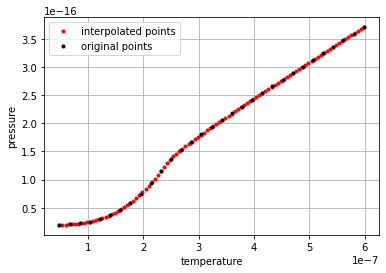

In [11]:
from scipy import interpolate

f_interpolation = interpolate.interp1d(Temperature,Pressure,kind='cubic')
Temp_interp=np.linspace(np.min(Temperature),np.max(Temperature),100)
Pressure_interp=f_interpolation(Temp_interp)

plt.plot(Temp_interp,Pressure_interp,'.r',label='interpolated points')
plt.plot(Temperature,Pressure,'.k',label='original points')
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.grid()
plt.legend()

In [12]:
Cv_interp=np.gradient(Pressure_interp,Temp_interp)
print (Cv_interp)

[3.94317588e-11 4.50599045e-11 5.69217006e-11 6.99945060e-11
 8.42783207e-11 9.97731448e-11 1.16486456e-10 1.34716427e-10
 1.55131378e-10 1.78134235e-10 2.03836196e-10 2.32578387e-10
 2.64663227e-10 3.00102538e-10 3.38599587e-10 3.79775860e-10
 4.23494748e-10 4.69301860e-10 5.16327340e-10 5.64116460e-10
 6.12460936e-10 6.60751746e-10 7.08511453e-10 7.55985793e-10
 8.05114313e-10 8.58084814e-10 9.15316201e-10 9.74695322e-10
 1.03271591e-09 1.08780313e-09 1.13909520e-09 1.18440351e-09
 1.22221822e-09 1.24853672e-09 1.24401268e-09 1.18929976e-09
 1.08326146e-09 9.56842448e-10 8.54898202e-10 7.94071726e-10
 7.65979639e-10 7.51349459e-10 7.38563830e-10 7.26954581e-10
 7.16758233e-10 7.08184467e-10 7.01214932e-10 6.95421129e-10
 6.90256461e-10 6.85550226e-10 6.81283900e-10 6.77423508e-10
 6.73951209e-10 6.70842072e-10 6.68018293e-10 6.65418878e-10
 6.63032942e-10 6.60837320e-10 6.58805881e-10 6.56931180e-10
 6.55199474e-10 6.53587970e-10 6.52086436e-10 6.50689626e-10
 6.49384259e-10 6.481611

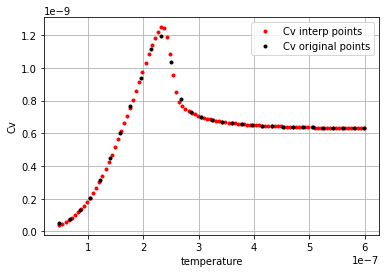

In [13]:
plt.plot(Temp_interp, Cv_interp, '.r',label='Cv interp points')
plt.plot(Temperature, Cv, '.k',label='Cv original points')

plt.xlabel('temperature')
plt.ylabel('Cv')
plt.grid()
plt.legend()

# Ejercicio 3

Dada es Matrix $S$:

$$S=
\begin{bmatrix}
1 &  -1 & -1 & -1\\
-1 &  2 & 0 & 0\\
-1 &  3 & 3 & 0 \\
-1 &  0 & 1 & 4 \\
\end{bmatrix}$$


a) calcular $S^5$ utilizando diagonalización.  

b) crear una funcion `matrix_power(A,n)` que recive dos parametros: matrix $A$, y valor entero de la potencia $n$. Funcion tiene que devolver una matrix $M=A^n$ (usa diagonalizacion)

In [3]:
from numpy.linalg import eig
import numpy as np
S=np.array([[1,-1,-1,-1],[-1,2,0,0],[-1,3,3,0],[-1,0,1,4]])
print("matriz original")
print(S)

values, vectors=eig(S)
P=vectors
D=np.zeros((4,4))
for i in range(0,4):
  D[i][i]=values[i]
D_power=np.zeros((4,4))
for j in range(0,4):
  D_power[j][j]=values[j]**5
inv_P=np.linalg.inv(P)
A=np.dot(P,D_power)
S_power=np.dot(A,inv_P)
print("matriz elevada a la quinta potencia")
print(S_power)
power = np.linalg.matrix_power(S,5)
print("potencia de la matriz usando numpy")
print(power)

matriz original
[[ 1 -1 -1 -1]
 [-1  2  0  0]
 [-1  3  3  0]
 [-1  0  1  4]]
matriz elevada a la quinta potencia
[[  485.  -755.  -563.  -563.]
 [ -179.   280.   192.   192.]
 [ -675.  1201.   707.   464.]
 [-1027.  1448.  1275.  1518.]]
potencia de la matriz usando numpy
[[  485  -755  -563  -563]
 [ -179   280   192   192]
 [ -675  1201   707   464]
 [-1027  1448  1275  1518]]


In [4]:
def my_matriz_power(A,n):
  values, vectors=eig(A)
  P=vectors
  D=np.zeros((len(A),len(A)))
  for i in range(0,len(A)):
    D[i][i]=values[i]
  D_power=np.zeros((len(A),len(A)))
  for j in range(0,len(A)):
    D_power[j][j]=values[j]**n
  inv_P=np.linalg.inv(P)
  B=np.dot(P,D_power)
  A_power=np.dot(B,inv_P)
  return A_power

print(my_matriz_power(S,5))

power = np.linalg.matrix_power(S,5)
print(power)

[[  485.  -755.  -563.  -563.]
 [ -179.   280.   192.   192.]
 [ -675.  1201.   707.   464.]
 [-1027.  1448.  1275.  1518.]]
[[  485  -755  -563  -563]
 [ -179   280   192   192]
 [ -675  1201   707   464]
 [-1027  1448  1275  1518]]


# Feedback:
```
Exercise 1.
Importation of the data + labeled plot (rho vs. r)	            (max 0.5p):	0.5p
Calculation of the integral                 		              (max 1.5p):	0.5p

Exercise 2.
Importation of the data + labeled plot P vs. T 	               (max 0.5p):	0.5p
Calculation of the derivative and plot Cv vs. T        		   (max 2.0p):	2.0p
Approximation of the critical temperature                         (max 0.5p):	0.5p
Interpolation                                                     (max 1.0p):	1.0p

Exercise 3.
Calculation of the M^n                                 	       (max 2.0p):	2.0p
Function of the M^n                                    	       (max 2.0p):	2.0p

- Total:                                                          (max 10.0p):   10.0p
```